 

  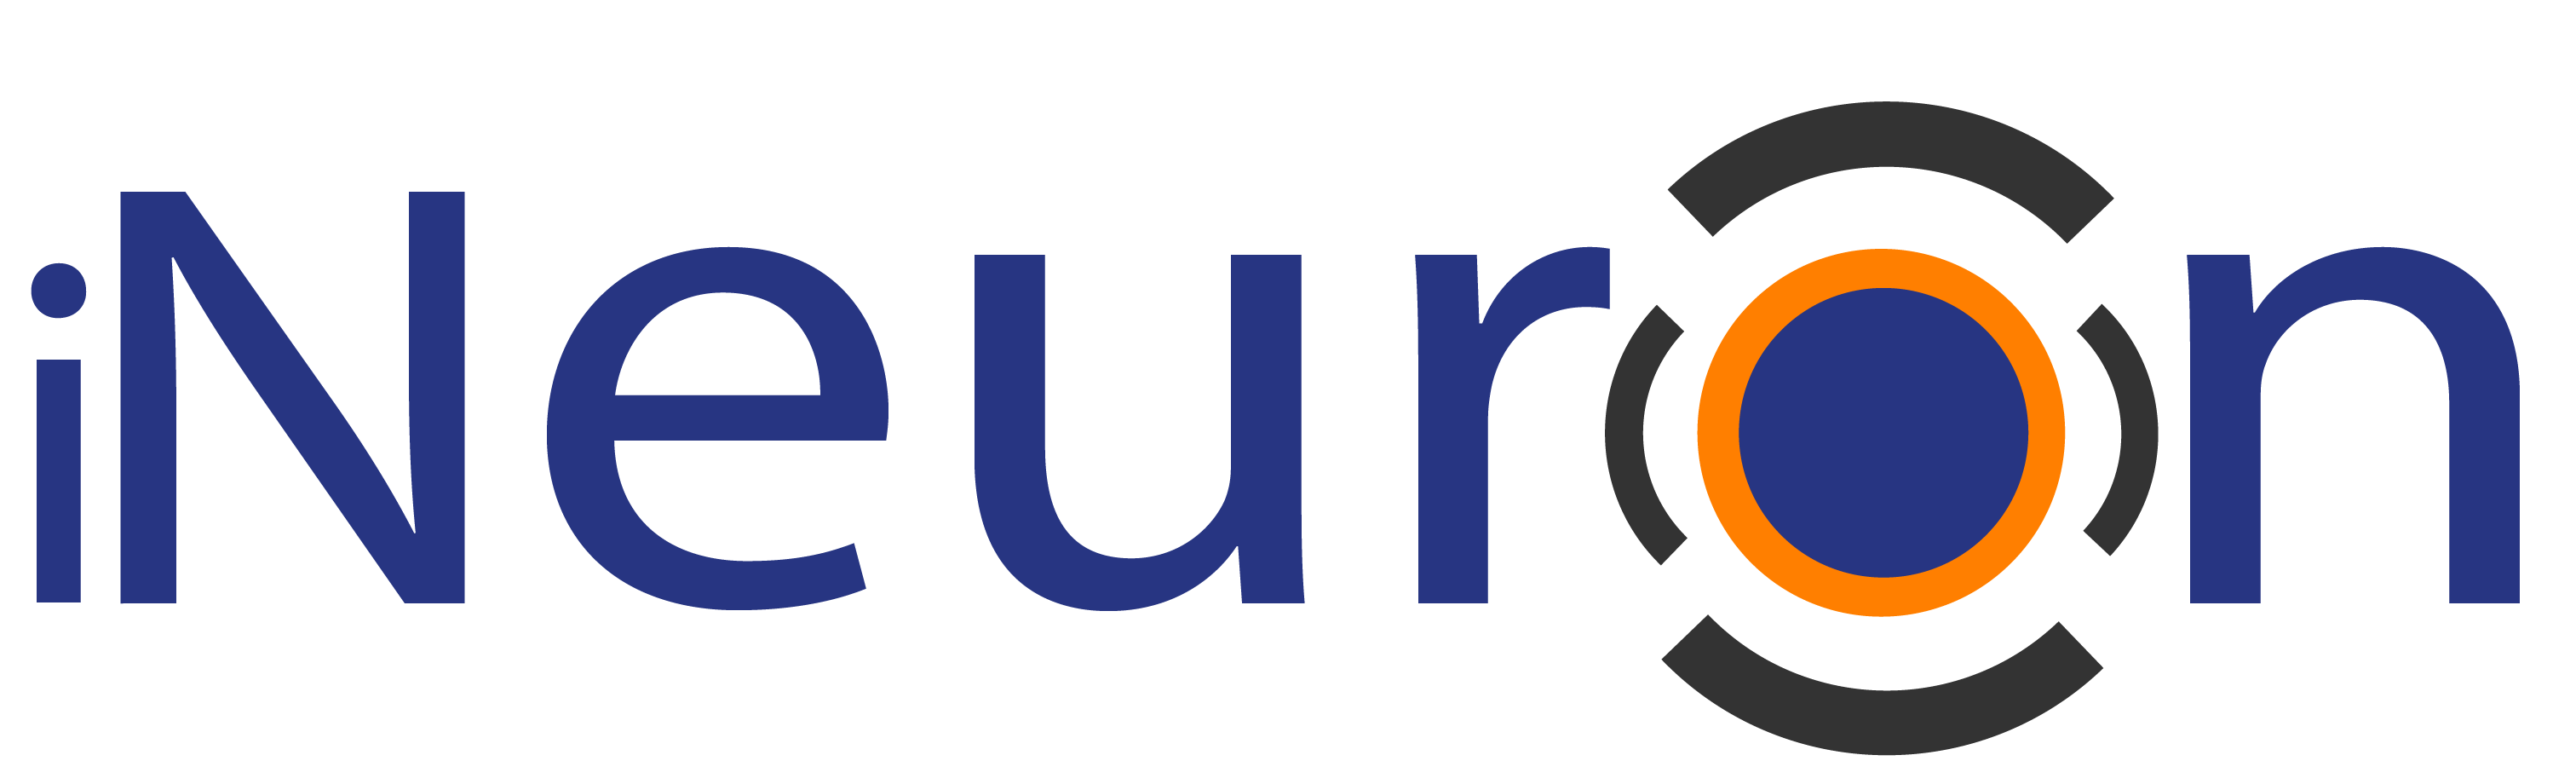

# Introduction to Python Part - IV

# Calss - 11 `Exception Handling` Part - I

## 12 June 2022

- Introduction To Exception Handling
- Exception Handling Keywords
- Exception Handling Syntax
- Handling Multiple Exceptions
- Handling All Exceptions 
- Using Exception Object
- Getting Details Of Exception
- Raising An Exception
- Using finally Block
- Creating User Defined Exceptions

##  Errors and Exception Handling

In this section, we will learn about Errors and Exception Handling in Python. You've might have definitely encountered errors by this point in the course. 
<br> For example :

In [1]:
print('Hello')

Hello


In [2]:
print('Hello)

SyntaxError: EOL while scanning string literal (1679058590.py, line 1)

Note how we get a SyntaxError, with the further description that it was an End of Line Error (EOL) while scanning the string literal. This is specific enough for us to see that we forgot a single quote at the end of the line. Understanding of these various error types will help you debug your code much faster. 

This type of error and description is known as an Exception. Even if a statement or expression is syntactically correct, it may cause an error when an attempt is made to execute it. Errors detected during execution are called exceptions and are not unconditionally fatal.

| Exception | description   |
|------|------|
|   Exception  | Base class of exception. Allother exception derived from this class.|
|   ArithmeticError  | Base class for those exceptions that are raised for arithmetic or numeric errors.|
|   ZeroDivisionError  | Raised when division or modulo operation is zero|
|   ModuleNotFoundError  | Raised by import when imported module could not be located|
|   KeyError  | Raised when a mapping (dictionary) key is not found in keys of a dictionary.|
|   MemoryError  | Raised when an operation runs out of memory|

You can check out the full list of built-in exceptions [here](https://docs.python.org/3.8/library/exceptions.html). Now, let's learn how to handle errors and exceptions in our own code.

In python, There are two popular saying for code styles:-

1) LBYL

2) EAFP

### LBYL

Look before you leap. 
This coding style explicitly tests for pre-conditions before making calls or lookups. This style contrasts with the EAFP approach and is characterized by the presence of many if statements.

In a multi-threaded environment, the LBYL approach can risk introducing a race condition between “the looking” and “the leaping”. For example, the code, if key in mapping: return mapping[key] can fail if another thread removes key from mapping after the test, but before the lookup. This issue can be solved with locks or by using the EAFP approach.

For this, you can refer in python documentation:-
>** https://docs.python.org/3/glossary.html **

In a simple language, we first check what we are going to do. For example, if we want to check if a file is available before trying to write:

```python
 if filename:
     with open()..
     ....
```

### EAFP

Easier to ask for forgiveness than permission. 

This common Python coding style assumes the existence of valid keys or attributes and catches exceptions if the assumption proves false. This clean and fast style is characterized by the presence of many try and except statements. The technique contrasts with the LBYL style common to many other languages such as C. 

In a simple language,EAFP is like we first write our code so that it performs and executes first, and then we will take care of the consequences if it doesn't work. That means we try running some code, expecting it to work, but if it failes then will handle it in exception in except block.

```python
try:
     with open(filename,'r').. # First executes
     ....
 except:
     # handling exception
```

## 14.2 try and except

The basic terminology and syntax used to handle errors in Python is the **try** and **except** statements. The code which can cause an exception to occur is put in the *try* block and the handling of the exception are the implemented in the *except* block of code. The syntax form is:
```python
    try:
        You do your operations here...
       ...
    except ExceptionI:
        If there is ExceptionI, then execute this block.
    except ExceptionII:
        If there is ExceptionII, then execute this block.
       ...
    else:
        If there is no exception then execute this block. 
```

Using just except, we can check for any exception: To understand better let's check out a sample code that opens and writes a file :

In [3]:
try:
    f = open('demo_file','w')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception and then execute this print statement
   print("Error: Could not find file or read data")
else: # this else block will execute if try block does not raise an exception
   print("Content written successfully")
   f.close()

Content written successfully


Now, let's see what happens when we don't have write permission? (opening only with 'r') :

In [4]:
f = open('demo_file','r')
f.write('Test write this')

print("fsfsfsfsf")

UnsupportedOperation: not writable

In [5]:
try:
    f = open('demo_file','r')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


Notice, how we only printed a statement! The code still ran and we were able to continue doing actions and running code blocks. This is extremely useful when you have to account for possible input errors in your code. You can be prepared for the error and keep running code, instead of your code just breaking as we saw above.

We could have also just said except: if we weren't sure what exception would occur. For example :

In [6]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except:
    # This will check for any exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


Now, we don't actually need to memorize the list of exception types! Now what if we keep wanting to run code after the exception occurred? This is where **finally** comes in.
### finally
The finally: Block of code will always be run regardless if there was an exception in the try code block. The syntax is:
```python
    try:
       Code block here
       ...
       Due to any exception, this code may be skipped!
    finally:
       This code block would always be executed.
```
For example :

In [7]:
try:
    f = open("testfile", "w")
    f.write("Test write statement")
finally:
    print("Always execute finally code blocks")

Always execute finally code blocks


We can use this in conjunction with except. Let's see a new example that will take into account a user putting in the wrong input :

In [8]:
def askint():
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            
        finally:
            print("Finally, I executed!")
        print(val)       

In [9]:
askint()

Please enter an integer: wasiq
Looks like you did not enter an integer!
Finally, I executed!


UnboundLocalError: local variable 'val' referenced before assignment

In [11]:
askint()

Please enter an integer: 56
Finally, I executed!
56


Check how we got an error when trying to print val (because it was properly assigned). Let's find the right solution by asking the user and checking to make sure the input type is an integer:

In [12]:
def askint():
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            try:
                val = int(input("Try again-Please enter an integer: "))
            except:
                print("handle it ")
        finally:
            print("Finally, I executed!")

In [14]:
askint()

Please enter an integer: six
Looks like you did not enter an integer!
Try again-Please enter an integer: 44
Finally, I executed!


Hmmm...that only did one check. How can we continually keep checking? We can use a while loop!

In [15]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            break
        else:
            print('Yep thats an integer!')
            break
        finally:
            print("Finally, I executed!")
            print(val) 

In [16]:
askint()

Please enter an integer: six
Looks like you did not enter an integer!
Finally, I executed!


UnboundLocalError: local variable 'val' referenced before assignment

### Raising an exception

We can raise an excepton by using raise statement. Let us check with examples :

In [17]:
def raise_exc(a):
    if a < 5:
        raise Exception(a) # If exception raised code below to this will not execute
        
    return a

try:
    res1 = raise_exc(7)
    print(res1)
    res = raise_exc(2)
    print(res)
except Exception as e:
    print("Error is ", e)

7
Error is  2


### User defined exception

Developers can create their own exceptions by creating a new exception which will be derived from the Exception class.The newly created exception nae should be ended with “Error” similar to naming of the standard exceptions in python.

In [20]:
''' Create user-defined exception 
    MyError is derived from super class Exception 
'''
class NewError(Exception): 
  
    # Constructor or Initializer 
    def __init__(self, val): 
        self.val = val 
  
    # __str__ is to print() the value 
    def __str__(self): 
        return(repr(self.val)) 
  
    try: 
        raise(NewError(5)) 
    except NewError as e: 
        print('A New Exception occured: ',e.val) 

A New Exception occured:  5


### Assertion

Python's assert statement helps you find bugs more quickly and with less pain.

Assertions are a systematic way to check that the internal state of a program is as the programmer expected, with the goal of catching bugs. In particular, they're good for catching false assumptions that were made while writing the code, or abuse of an interface by another programmer. In addition, they can act as in-line documentation to some extent, by making the programmer's assumptions obvious. ("Explicit is better than implicit.")

For more,
>**Refer:-** https://wiki.python.org/moin/UsingAssertionsEffectively

In [21]:
# Assert for comparing two variables
try: 
    x = 1
    y = 1
    assert x != y, "Both variables are not the same"
    print(x , y) 
  
# the error message we provided gets printed  
except AssertionError as msg:  
    print(msg) 

Both variables are not the same


In [22]:
# Looping through list and print division of given element with the element itself if element is int else raise exception

list1 = ['a', 0, 2] # For str 'a' raise error, for 0 raise zero division error

for el in list1:
    try:
        print("The element is", el)
        res = int(el)/int(el)
        break
    except Exception as e:
        print("Oo!", e, "occurred.")
        print("Next check for another element in a list.")
        print()
print(res)

The element is a
Oo! invalid literal for int() with base 10: 'a' occurred.
Next check for another element in a list.

The element is 0
Oo! division by zero occurred.
Next check for another element in a list.

The element is 2
1.0


In [23]:
# try with if condition if not positive number it will raise an exception using raise
try:
    a = int(input("Enter a positive integer: "))
    if a <= 0:
        raise ValueError("That is not a positive number!")
except ValueError as ve:
    print(ve)

Enter a positive integer: -6
That is not a positive number!


In [25]:
# Simple program for even number using try else and assert 
try:
    num = int(input("Enter a number: "))
    assert num % 2 == 0
except:
    print("Not an even number!")
else:
    print("Executing else block as try block hasn't raise an exception.")

Enter a number: 34
Executing else block as try block hasn't raise an exception.


In [26]:
# Defining function for raising exception
def raise_exception(ex):
    raise ex

In [27]:
# Use of lambad function with exception raise if value < 10 will raise an exception
y = lambda x: 2*x if x < 10 else raise_exception(Exception('Value is greater than 10'))

In [28]:
y(5)

10

In [29]:
y(20)

Exception: Value is greater than 10

In [30]:
# defining function for finding sqrt and checking type of number and raise exception if not an int/float
import math
def find_sqrt(a):
    if not isinstance(a,(int,float)):
        raise TypeError("a must be numeric")
    elif a < 0:
        raise TypeError("a should not be negative")
    else:
        print(math.sqrt(a))

In [31]:
find_sqrt("scsc")

TypeError: a must be numeric

In [32]:
find_sqrt(-56)

TypeError: a should not be negative

In [33]:
find_sqrt(6)

2.449489742783178


### What is an Exception ?
Exception are errors that occur at runtime .



In other words , if our program encounters an abnormal situation during it’s execution it raises an exception.


For example,the statement 
```python        
a=10/0 
```
will generate an exception because Python has no way to solve division by 0

### What Python Does When An Exception Occurs ?
Whenever an exception occurs , Python does 2 things :

It immediately terminates the code

It displays the error message related to the exception in a technical way

Both the steps taken by Python cannot be considered user friendly because
Even if a statement generates exception , still other parts of the program must get a chance to run

The error message must be simpler for the user to understand

## A Sample Code

In [34]:
a = int(input("Enter first no:"))
b = int(input("Enter second no:"))
c = a/b
print("Div is", c)
d = a + b
print("Sum is", d)

Enter first no:10
Enter second no:a


ValueError: invalid literal for int() with base 10: 'a'

As we can observe , in the second run the code generated exception because Python does not know how to handle division by 0. Moreover it did not even calculated the sum of 10 and 0 which is possible.

In [35]:
a=int(input("Enter first no:"))
b=int(input("Enter second no:"))
c=a/b
print("Div is",c)
d=a+b
print("Sum is",d)

Enter first no:10
Enter second no:0


ZeroDivisionError: division by zero

In this case since it is not possible for Python to covert “2a” into an integer , so it generated an exception . But the message it displays is too technical to understand.

## How to Handle

### Such Situations ?
If we want our program to behave normally , even if an exception occurs , then we will have to apply     Exception Handling


Exception handling is a mechanism which allows us to handle errors gracefully while the program is running instead of abruptly ending the program execution.

Python provides 5 keywords to perform Exception Handling :

**try**

**except**

**else**

**raise**

**finally**

Following is the syntax of a Python try-except-else block.
```python
try: 

	You do your operations here; 
	...................... 
except ExceptionI:

	If there is ExceptionI, then execute this block.
    
except ExceptionII:

	If there is ExceptionII, then execute this block. 
	...................... 
else:

	If there is no exception then execute this block.
```

Remember ! 

In place of Exception I and Exception II , we have to use the names of Exception classes in Python


In [36]:
a = int(input("Enter first no:"))
b = int(input("Enter second no:"))
try:
    c = a/b
    print("Div is", c)
except ZeroDivisionError as e:
    print(e)
d = a+b
print("Sum is", d) 

Enter first no:10
Enter second no:0
division by zero
Sum is 10


In [37]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


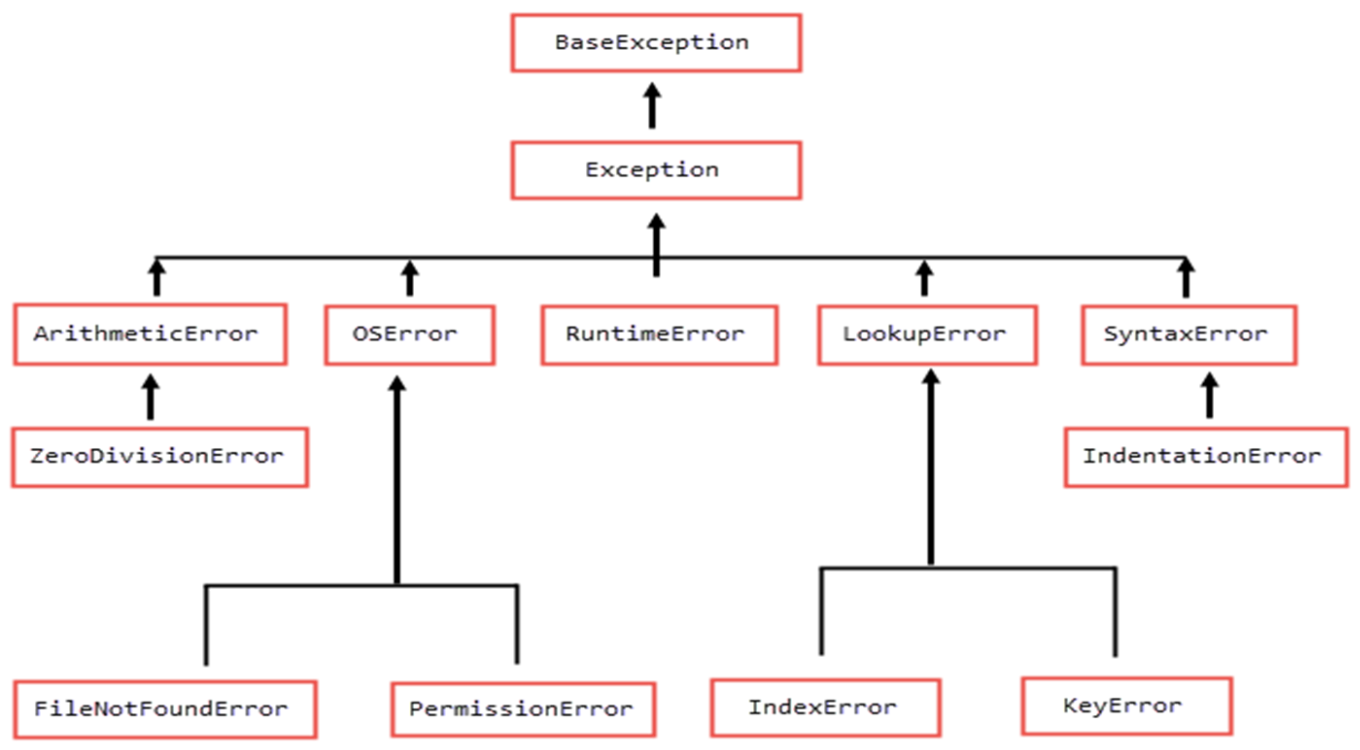

In [40]:
from IPython.display import Image
Image(filename='Screenshot_.png')

In [41]:
#Amongst all the exceptions mentioned in the previous slides, we cannot handle SyntaxError exception , because it is raised by Python even before the program starts execution

#Example:

a = int(input("Enter first no:"))
b = int(input("Enter second no:"))
try:
    c = a/b
    print("Div is", c))
except SyntaxError:
    print("Wrong Syntax")
d = a+b
print("Sum is", d)

SyntaxError: unmatched ')' (1772614737.py, line 9)

A try statement may have more than one except clause for different exceptions.But at most one except clause will be executed

Also , we must remember that if we are handling parent and child exception classes in except clause then the parent exception must appear after child exception , otherwise child except will never get a chance to run

In [42]:
import math
try:

    x=10/5
    print(x)
    ans=math.exp(3)
    print(ans)

except ZeroDivisionError:
    print("Division by 0 exception occurred!")	
except ArithmeticError:
    print("Numeric calculation failed!")

2.0
20.085536923187668


In [43]:
import math
try:

    x=10/0
    print(x)
    ans=math.exp(20000)
    print(ans)

except ZeroDivisionError:
    print("Division by 0 exception occurred!")	
except ArithmeticError:
    print("Numeric calculation failed!")

Division by 0 exception occurred!


In [44]:
import math
math.exp(20000)

OverflowError: math range error

In [45]:
import math
try:

    x=10/5
    print(x)
    ans=math.exp(20000)
    print(ans)

except ZeroDivisionError:
    print("Division by 0 exception occurred!")	
except ArithmeticError:
    print("Numeric calculation failed!")

2.0
Numeric calculation failed!


In [46]:
import math
try:

	x=10/5
	print(x)
	ans=math.exp(20000)
	print(ans)

except ArithmeticError:
	print("Numeric calculation failed!")
except ZeroDivisionError:
	print("Division by 0 exception occurred!")

2.0
Numeric calculation failed!


In [47]:
import math
try:

	x=10/0
	print(x)
	ans=math.exp(20000)
	print(ans)

except ArithmeticError:
	print("Numeric calculation failed!")
except ZeroDivisionError:
	print("Division by 0 exception occurred!")	

Numeric calculation failed!


**Exercise**

Write a program to ask the user to input 2 integers and calculate and print their division. Make sure your program behaves as follows:

If the user enters a non integer value then ask him to enter only integers
If denominator is 0 , then ask him to input non-zero denominator
Repeat the process until correct input is given

Only if the inputs are correct then display their division and terminate the code

In [48]:
while(True):
	try:
		a = int(input("Input first no:"))
		b = int(input("Input second no:"))
		c = a/b
		print("Div is ",c)
		break;
	except ValueError:
		print("Please input integers only! Try again")	
	except ZeroDivisionError:
		print("Please input non-zero denominator")	

Input first no:10
Input second no:-2
Div is  -5.0


If we want to write a single except clause to handle multiple exceptions , we can do this .

For this we have to write names of all the exceptions within parenthesis separated with comma after the keyword except


In [49]:
while(True):
	try:
		a = int(input("Input first no: "))
		b = int(input("Input second no: "))
		c = a/b
		print("Div is ", c)
		break;
	except (ValueError,ZeroDivisionError):
		print("Either input is incorrect or denominator is 0. Try again!")	


Input first no: 0
Input second no: 0
Either input is incorrect or denominator is 0. Try again!
Input first no: 2
Input second no: a
Either input is incorrect or denominator is 0. Try again!
Input first no: 5
Input second no: 2
Div is  2.5


We can write the keyword except without any exception class name also .

In this case for every exception this except clause will run .

The only problem will be that we will never know the type of exception that has occurred!

Following is the syntax of a Python handle all exception  block.
```python
try: 
	You do your operations here; 
	...................... 
except : 
	For every kind of exception this block will execute

```

#### Notice , we have not provided any name for the exception


In [50]:
while(True):
    try:
        a=int(input("Input first no:"))
        b=int(input("Input second no:"))
        c=a/b
        print("Div is ",c)
        break;
    except:
        print("Some problem occurred. Try again!")	


Input first no:10
Input second no:0
Some problem occurred. Try again!
Input first no:12
Input second no:9
Div is  1.3333333333333333


#### Using Exception Object
Now we know how to handle exception, in this section we will learn how to access exception object in exception handler code. 

To access the exception object created by Python we can use the keyword as and assign it to a variable.

Finally using that variable we can get the details of the exception

In [51]:
a = 10
b = 'c'
d = a/b
print(d)

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [52]:
a = int(input("Input first no:"))
b = int(input("Input second no:"))
c = a/b
print(c)

Input first no:10
Input second no:a


ValueError: invalid literal for int() with base 10: 'a'

In [53]:
while(True):
    try:
        a = int(input("Input first no:"))
        b = int(input("Input second no:"))
        c = a/b
        print("Div is ",c)
        break;
    except (ValueError,ZeroDivisionError) as e:
        print(e)

Input first no:10
Input second no:0\
invalid literal for int() with base 10: '0\\'
Input first no:0\\
invalid literal for int() with base 10: '0\\\\'
Input first no:10
Input second no:5
Div is  2.0


Python allows us to get more details about the exception by calling the function `exc_info()`.

Following are it’s important points:

It is available in the module sys

It returns a tuple containing 3 items called type, value and traceback

The variable type is the name of exception class, value is the instance of exception class and traceback contains the complete trace of the exception

In [54]:
import sys
while(True):
	try:
		a=int(input("Input first no:"))
		b=int(input("Input second no:"))
		c=a/b
		print("Div is ",c)
		break;
	except:
		a,b,c=sys.exc_info()
		print("Exception class:",a)
		print("Exception message:",b)
		print("Line number:",c.tb_lineno) 	

Input first no:10
Input second no:0
Exception class: <class 'ZeroDivisionError'>
Exception message: division by zero
Line number: 6
Input first no:1
Input second no:2
Div is  0.5


Sometimes , we need to print the details of the exception exactly like Python does .

We do this normally , when we are debugging our code.

The class traceback which is available in the module traceback helps us do this

======================================================

This class contains a method called `format_exc( )` 

It is a class method of traceback class and returns complete details of the exception as a string.

This string contains :

The program name in which exception occurred

Line number where exception occurred

The code which generated the exception

The name of the exception class

The message related to the exception

In [55]:
import traceback

In [56]:
while(True):
	try:
		a=int(input("Input first no:"))
		b=int(input("Input second no:"))
		c=a/b
		print("Div is ",c)
		break;
	except:
		print(traceback.format_exc())

Input first no:10
Input second no:0
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_9196\3554607046.py", line 5, in <cell line: 2>
    c=a/b
ZeroDivisionError: division by zero

Input first no:10
Input second no:3
Div is  3.3333333333333335


### Raising An Exception
We can force Python to generate an Exception using the keyword raise.

This is normally done in those situations where we want Python to throw an exception in a particular condition of our choice
Syntax:

raise ExceptionClassName

raise ExceptionClassName( message )

Write a program to ask the user to input 2 integers and calculate and print their division. Make sure your program behaves as follows:

If the user enters a non integer value then ask him to enter only integers
If denominator is 0 , then ask him to input non-zero denominator
If any of the numbers is negative then display the message negative numbers not allowed
Repeat the process until correct input is given

Only if the inputs are correct then display their division and terminate the code

In [57]:
while(True):
    a=int(input("please write a input:"))
    if a>10:
        break
    print("please enter greater than 10")

please write a input:9
please enter greater than 10
please write a input:10
please enter greater than 10
please write a input:8
please enter greater than 10
please write a input:10
please enter greater than 10
please write a input:11


In [58]:
while(True):
	try:
		a=int(input("Input first no:"))
		b=int(input("Input second no:"))
		if a<0 or b<0:
			raise Exception("Negative numbers not allowed!Try again")
		c=a/b
		print("Div is ",c)
		break;
	except ValueError:
		print("Please input integers only! Try again")	
	except ZeroDivisionError:
		print("Please input non-zero denominator")	
	except Exception as e:
		print(e)

Input first no:10
Input second no:a
Please input integers only! Try again
Input first no:10
Input second no:0
Please input non-zero denominator
Input first no:10
Input second no:-4
Negative numbers not allowed!Try again
Input first no:10
Input second no:5
Div is  2.0


If we have a code which we want to run in all situations, then we should write it inside the  finally block.

Python will always run the instructions coded in the finally block.

It is the most common way of doing clean up tasks , like, closing a file or disconnecting with the DB or logging out the user etc.

The finally block has 2 syntaxes :

Syntax 1
```python
try:
	# some exception generating code
except :
	# exception handling code
finally:
	# code to be always executed
try:
	# some exception generating code
finally:
	# code to be always executed
```

In [60]:
while(True):
	try:
		a=int(input("Input first no:"))
		b=int(input("Input second no:"))
		c=a/b
		print("Div is ",c)
		break;
	except ZeroDivisionError:
		print("Denominator should not be zero")	
	finally:
		print("Thank you for using the app!")	

Input first no:10
Input second no:0
Denominator should not be zero
Thank you for using the app!
Input first no:10
Input second no:5
Div is  2.0
Thank you for using the app!


Python has many built-in exceptions which forces our program to output an error when something in it goes wrong.

However, sometimes we may need to create our own exceptions which will be more suitable for our purpose.

Such exceptions are called User Defined Exceptions

In Python, users can define such exceptions by creating a new class. 

This exception class has to be derived, either directly or indirectly, from Exception class. 

Most of the built-in exceptions are also derived form this class.

In [61]:
class NegativeNumberException(Exception):
    def __init__(self):
        print("please type a pos number")

In [62]:
while(True):
	try:
		a=int(input("Input first no:"))
		b=int(input("Input second no:"))
		if a<0 or b<0:
			raise NegativeNumberException()
		c=a/b
		print("Div is ",c)
		break;
	except ValueError:
		print("Please input integers only! Try again")	
	except ZeroDivisionError:
		print("Please input non-zero denominator")	
	except NegativeNumberException as e:
		print(e)	

Input first no:10
Input second no:-1
please type a pos number

Input first no:10
Input second no:5
Div is  2.0


In [63]:
import math
ans=math.exp(20000)

OverflowError: math range error

# `EXCEPTION HANDLING` Part - II

## 12 June 2022

We know that compiler converts source code into byte code which is then consumed by interpreter.
**There are can be 2 types of errors**: Compile Time Error (Syntax Error) and Run Time Error. 

Exception Handling comes under Run Time Error and takes place in interpreter where as compile time error takes place inside compiler.

In [64]:
a = 10
b = 20
c = a + b
print(c)

30


In [65]:
#Syntax Error
a = 10
b = 20
c = a + b
print(c

SyntaxError: unexpected EOF while parsing (2232892530.py, line 5)

In [66]:
#Type Error
a = 10
b = 's'
c = a + b 
print(c)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [67]:
#Zero Division Error
a = int(input("Enter first number"))
b = int(input("Enter second number"))
c = a / b
print(c)

Enter first number10
Enter second number0


ZeroDivisionError: division by zero

If we don't handle Exceptions, then  --- >
1. My further code execution will stop. This might hamper my project
2. This is not user friendly 

In [68]:
#Importance of Exception Handling: Even if b is 0, then atleast d should be printed if not c. 
#So, we need to handle Exceptions so that in a big project, it does not hamper the entire project

a = int(input("Enter first number"))
b = int(input("Enter second number"))
c = a / b
print(c)
d = a * b
print(d)

Enter first number10
Enter second number0


ZeroDivisionError: division by zero

Keywords used to handle Exceptions: 

Try

Else

Except

Raise

Finally

In [70]:
#Zero Division Exception Handling
a = int(input("Enter first number "))
b = int(input("Enter second number "))
try:
    c = a / b
    print(c)
except:
    print("b should not be 0")

Enter first number 10
Enter second number 0
b should not be 0


In [71]:
#Zero Division Exception Handling
a = int(input("Enter first number "))
b = int(input("Enter second number "))
try:
    c = a / b
    print(c)
except ZeroDivisionError: #Writing class name is a good practice. We should follow this approach
    print("b should not be 0")

Enter first number 20
Enter second number 0
b should not be 0


In [72]:
#Unable to catch because its a compile error and not a runtime error
a = int(input("Enter first number"))
b = int(input("Enter second number"))
try:
    c = a / b
    print(c
except:
  print("Wrong Syntax")

d = a + b

SyntaxError: invalid syntax (4052926261.py, line 7)

Write a program to ask the user to input two integers and print their division. Make sure program behaves the following :

1) If the user enters a non integer value then ask him to enter only integers

2) If denominator is 0, then ask him to input non-zero denominator

Repeat the process until the correct input is given. Only if the inputs are correct, then display their division and terminate the code

In [74]:
while True:
  
  try:
    a = int(input("Enter first number"))
    b = int(input("Enter second number"))
    c = a/b
    print(c)
    break
  except ZeroDivisionError:
    print("Input non-zero denominator")

  except ValueError:
    print("String not allowed")   

Enter first number1
Enter second number3
0.3333333333333333


In [75]:
#Another way of writing with one except block
while True:
  
  try:
    a = int(input("Enter first number"))
    b = int(input("Enter second number"))
    c = a/b
    print(c)
    break
  except (ZeroDivisionError,ValueError):
    print("Input non-zero denominator and strings not allowed")

Enter first number10
Enter second numbera
Input non-zero denominator and strings not allowed
Enter first number10
Enter second number5
2.0


In [76]:
while True:
  
  try:
    a = int(input("Enter first number"))
    b = int(input("Enter second number"))
    c = a/b
    print("div:", c)
    break
  except ZeroDivisionError as e:
    print(e)

Enter first number10
Enter second number0
division by zero
Enter first number10
Enter second number5
div: 2.0


In [77]:
import sys
while True:
  
  try:
    a = int(input("Enter first number"))
    b = int(input("Enter second number"))
    c = a/b
    print("div:", c)
    break
  except:
    print(sys.exc_info()) 

Enter first number10
Enter second number0
(<class 'ZeroDivisionError'>, ZeroDivisionError('division by zero'), <traceback object at 0x0000015C91AC2300>)
Enter first number10
Enter second number3
div: 3.3333333333333335


In [78]:
import sys
while True:
  
  try:
    a = int(input("Enter first number"))
    b = int(input("Enter second number"))
    c = a/b
    print("div:", c)
    break
  except:
    a,b,c = sys.exc_info()
    print('Exception Class', a)
    print('Exception Message', b)
    print('Line Number', c.tb_lineno)

Enter first number10
Enter second number0
Exception Class <class 'ZeroDivisionError'>
Exception Message division by zero
Line Number 7
Enter first number7
Enter second number3
div: 2.3333333333333335


In [79]:
import traceback  #Helps us to debug our project (Entire description of Exception)
while True:
  
  try:
    a = int(input("Enter first number"))
    b = int(input("Enter second number"))
    c = a/b
    print("div:", c)
    break
  except:
    print(traceback.format_exc())

Enter first number19
Enter second number0
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_9196\4239490529.py", line 7, in <cell line: 4>
    c = a/b
ZeroDivisionError: division by zero

Enter first number12
Enter second number3
div: 4.0


In [80]:
#Raise Exception: Its Custom Exception LIne
while True:
  try:
    a = int(input("Enter first number:"))
    b = int(input("Enter second number:"))
    if a < 0 or b < 0: raise Exception("Negative Number not allowed")  #Raising custom Exception using keyword 'raise': Similar to 'throw' in Java
    c = a / b
    print("div is", c)
    break
  except ValueError:
    print("Please enter int only")
  except ZeroDivisionError:
    print("Please enter non-zero denominator")
  except Exception as e:
    print(e)

Enter first number:10
Enter second number:0
Please enter non-zero denominator
Enter first number:10
Enter second number:a
Please enter int only
Enter first number:10
Enter second number:-10
Negative Number not allowed
Enter first number:10
Enter second number:2
div is 5.0


In [81]:
#Custom Exception
class NegativeNumberException(Exception):  #Inheriting Class Exception
  pass

while True:
  try:
    a = int(input("Enter first number:"))
    b = int(input("Enter second number:"))
    if a < 0 or b < 0: raise NegativeNumberException("Negative Number not allowed")  #Custom Exception: NegativeNumberException class has to be defined for this code to run
    c = a / b
    print("div is", c)
    break
  except ValueError:
    print("Please enter int only")
  except ZeroDivisionError:
    print("Please enter non-zero denominator")
  except NegativeNumberException as e:
    print(e)


Enter first number:10
Enter second number:-10
Negative Number not allowed
Enter first number:10
Enter second number:3
div is 3.3333333333333335


In [82]:
#Concept of Finally Block: Python will always run the instruction written in 'finally' block
try:
  a = int(input("Enter first number:"))
  b = int(input("Enter second number"))
  c=a/b
  print(c)
except:
  print("Dont use zero in Denominator")

finally:  #Will always run: Suppose we have created one database. We forgot to close the connection. Then this would lead to loss. 
          #So, better to put crucial codes in finally block. Even if error occurs, finally block will be printed
  print("hello")
  print("python")

Enter first number:10
Enter second number0
Dont use zero in Denominator
hello
python


In [83]:
#Concept of else 
try:
  a = int(input("Enter first number:"))
  b = int(input("Enter second number"))
  c=a/b
  print(c)
except:
  print("Dont use zero in Denominator")

else:  #If we get error then this will not be printed unlike finally
  print("python rocks")

Enter first number:10
Enter second number20
0.5
python rocks


# Calss - 12 `File`

## 18 June 2022

In [84]:
l=[1,3,4,5,5]
for i in l :
    print(i)

1
3
4
5
5


In [85]:
#next is inbuilt function that  extracts information one by one and give it to us
next(l)

TypeError: 'list' object is not an iterator

In [86]:
 #Dataset which are iterable can be converted into iterator eg: List, String, Tuple: Internally for loop calls iter function which converts iterable into iterator 
 #and then one by one by using next function, it will start extracting information
b=iter(l)

In [87]:
next(b)

1

In [88]:
next(b)

3

In [89]:
next(b)

4

In [90]:
next(b)

5

In [91]:
next(b)

5

In [92]:
next(b)

StopIteration: 

In [93]:
next(45)

TypeError: 'int' object is not an iterator

In [94]:
for i in 4567:
    print(i)

TypeError: 'int' object is not iterable

In [95]:
#Internally calls iter() and next() to extract each element one by one
for i in l:
    print(i)

1
3
4
5
5


In [96]:
s="sudh" #We need to convert string iterable into iterator

In [97]:
next(s)

TypeError: 'str' object is not an iterator

In [98]:
s=iter(s)

In [99]:
next(s)

's'

In [100]:
next(s)

'u'

In [101]:
next(s)

'd'

In [102]:
next(s)

'h'

In [103]:
next(s)

StopIteration: 

In [104]:
s="sudh"
for i in s:
    print(i)

s
u
d
h


In [105]:
t=(5,6,7,8,8)

In [106]:
t=iter(t)

In [107]:
next(t)

5

In [108]:
next(t)

6

In [109]:
next(t)

7

In [110]:
next(t)

8

In [111]:
next(t)

8

In [112]:
next(t)

StopIteration: 

In [113]:
#Generator Functions
range(1,10) #Generatign dataset for me

range(1, 10)

In [114]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [115]:
def m(n):
    x=[i*i for i in range(n)]
    return x
    

In [116]:
m(4)

[0, 1, 4, 9]

In [117]:
#range behaves as a generator. 
#Doesnt output anything unless asked (Like in range when we put list function then only we got output). Such functions are called as Generator Functions
#Instead of return, we are using yield so that our function will become a generator and will return an object
def q(n):
    x=[i*i for i in range(n)]
    yield x

In [118]:
q(4) #Object is returned. Which means using this we will be able to generate dataset at any point of time like below

<generator object q at 0x0000015C9229CB30>

In [119]:
for i in q(4):
    print(i)

[0, 1, 4, 9]


In [120]:
for i in range(4):
    print(i)

0
1
2
3


In [121]:
next(q(4))

[0, 1, 4, 9]

In [122]:
r=iter(range(4))

In [123]:
next(r)

0

In [124]:
next(r)

1

In [125]:
next(r)

2

In [126]:
next(r)

3

In [127]:
next(r)

StopIteration: 

**yield** is the keyword to convert any object to generator function

In [128]:
#Fibonacci Series Program
def genfib(n):
    a=1
    b=1
    l=[]
    for i in range(n):
        l.append(a)
        a,b = b, a+b #logic for fibunaki series
    return(l)

In [129]:
genfib(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [130]:
#Generator Function
def genfib1(n):
    a=1
    b=1

    for i in range(n):
        yield a
      
        a,b = b, a+b 

In [131]:
genfib(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [132]:
#Generator Function
def genfib1(n):
    a=1
    b=1

    for i in range(n):
        yield a
      
        a,b = b, a+b 

In [133]:
genfib(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [134]:
for i in genfib1(10):
    print (i)

1
1
2
3
5
8
13
21
34
55


In [135]:
f=open("m.docx","r" )

FileNotFoundError: [Errno 2] No such file or directory: 'm.docx'

In [136]:
f1= open("test1.docx", "w")

In [137]:
f1.write("1234")

4

In [138]:
f1.close()

In [139]:
l=[1,2,3,4,5,6,677,78]

In [140]:
f2=open("test2.docx", "w")

In [141]:
f2.write(str(l))

27

In [142]:
f2.close()

In [143]:
f3=open("test.sudh", "w")
f3.write("sduwuyxdvguydxt")
f3.close()

In [144]:
%%writefile test5.txt
this is my python
this is my pythonthis is my pythonvv

Writing test5.txt


In [145]:
f=open("test5.txt")

In [146]:
f.read()

'this is my python\nthis is my pythonthis is my pythonvv\n'

In [147]:
f.read()

''

In [148]:
f.seek(0)

0

In [149]:
f.read()

'this is my python\nthis is my pythonthis is my pythonvv\n'

In [150]:
f.seek(2)

2

In [151]:
f.read()

'is is my python\nthis is my pythonthis is my pythonvv\n'

In [152]:
f1=open("test5.txt")

In [153]:
f1.tell()

0

In [154]:
f1.read()

'this is my python\nthis is my pythonthis is my pythonvv\n'

In [155]:
f1.tell()

57

In [156]:
f1.seek(5)

5

In [157]:
f1.tell()

5

In [158]:
f1.read()

'is my python\nthis is my pythonthis is my pythonvv\n'

In [159]:
f1.seek(0)

0

In [160]:
f1.tell()

0

In [161]:
f1.read(15)

'this is my pyth'

In [162]:
f2=open("test5.txt")

In [163]:
f2.read()

'this is my python\nthis is my pythonthis is my pythonvv\n'

In [164]:
f2.seek(0)

0

In [165]:
f2.readline()

'this is my python\n'

In [166]:
f2.readlines()

['this is my pythonthis is my pythonvv\n']

In [167]:
f2

<_io.TextIOWrapper name='test5.txt' mode='r' encoding='cp1252'>

In [168]:
f2.fileno()

7

In [169]:
f=open("test.txt", "w")

In [170]:
f.write("hello medha, youre great, hello dear, ssup, cool, yup, yumm, sexy, believe")

74

In [171]:
f.close()

In [172]:
f=open("test.txt", "a")

In [173]:
f.write("medhu is cool, very yum")

23

In [174]:
f.close()

In [175]:
f.name

'test.txt'

In [176]:
f.closed

True

In [177]:
f.mode

'a'

## `map`, `reduce`, `filter`

In [178]:
l=[2,3,4,5,6]

In [179]:
l1=[]
for i in l:
    l1.append(i**2)
    

In [180]:
l1

[4, 9, 16, 25, 36]

In [181]:
def sq(n):
    return n**2

In [182]:
l

[2, 3, 4, 5, 6]

In [183]:
list(map(sq,1))

TypeError: 'int' object is not iterable

In [184]:
l=[1,2,3,4]

In [185]:
def sq(n):
    return n**2

In [186]:
list(map(sq,l))

[1, 4, 9, 16]

In [187]:
l

[1, 2, 3, 4]

In [188]:
list(map(lambda x : str(x), l))

['1', '2', '3', '4']

In [189]:
from functools import reduce

In [190]:
l=[3,4,5,6,7,8,9]
sum(l)

42

In [191]:
reduce(lambda a,b:a+b , l)

42

In [192]:
reduce(lambda a,b:a*b , l)

181440

In [193]:
reduce(lambda a,b,c :a*b*c , l)

TypeError: <lambda>() missing 1 required positional argument: 'c'

In [194]:
l=[3]

In [195]:
reduce(lambda a,b:a*b , l)

3

In [196]:
l=[1,2,3,4,45,5,6,7,8,9]

In [197]:
list(filter(lambda a:a%2==0, l) )

[2, 4, 6, 8]

In [198]:
def checkeven(n):
    if n%2==0:
        return True

In [199]:
list(filter(checkeven, l))

[2, 4, 6, 8]

# Calss - 13 `PYCHARM INSTALLATION AND SETUP CLASS`

## 19 June 2022

1. Install Pycharm Community Edition (You can use Visual Studio Code Also). Professional Edition will ask for license after 30 days. Community Edition has all the features we need.
2. Best for development projects in Python 
3. Why we are using Pycharm?: 
4. Logging, Integration of Logging, Modular Coding, OOPs concept, Debugging (Server Side and CLient Side debugging will be difficult in Jupyter) in structured way: We can do all this in Jupyter notebook but when we are talking about big development project, we require Integrated Development Code (IDE). Hence we need an IDE like Pycharm. There will no changes in logic. Only structure will change in IDE.
5. Internal Working of Pycharm: 
6. Select New Environment as Conda as we already have Conda Installed. No need to select Interpreter as we creating new environment
7. Choose version basis Python installed in company otherwise select latest
8. main.py is a python file that has been created. We can right click and run
9. Run tab shows us the output and there is also a Terminal Tab 
10. Dont forget to use Ctrl + s and then run using right click on main.py file
11. if __name__ == '__main__': We are giving instruction to python compiler: Without using this, we can still get the output by calling function.
12. Dont forget to give extension while creating new file in the directory
13. Proper Structure of code using Directories by following a hierarchy (Advantage of Pycharm)
14. Another Advantage is Auto-Complete Option while writing code
15. Another Advantage of Pycharm: No need to use Shift+Tab as we use in Jupyer Notebook to see help/documentation but in pycharm, we just need to hover the mouse on top of the function and we get the help.
16. pip install in terminal tab to install relevant packages
17. Awesome Debugging feature in Pycharm: Select lines of code you want understand step by step: Place red dot (Debuggin points) in code: Right click and select debug mode and then Use Step into (Download like symbol) to run till next debug points. We can even at the time of runtime put custom values and check. 

# TASK - 6
Create a fresh project and create python files for all function related tasks and then try to put all files in one directory in PyCharm (To familiarize with Pycharm Interface) 5th June Task to be replicated.

# Calss - 14 `Python Project`

## 29 June 2022

**This Python Project covered in Pycharm**

# Calss - 15 `Exception Handling Revision`

## 30 June 2022

**Everything related to this class discussed above**